In [81]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub

In [82]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /Users/igor/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [188]:
trnsfrms = T.Compose([
    T.ColorJitter(),
    T.RandomRotation(60),
    T.RandomHorizontalFlip(),
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)
trnsfrms2 = T.Compose([
    
    T.Resize((224, 224)),
    T.ToTensor()
    ]
)

In [189]:
train_dataset = torchvision.datasets.ImageFolder('/Users/igor/ds_bootcamp/Inception_ph2w1/Images/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train',
                                                 transform=trnsfrms)
valid_dataset = torchvision.datasets.ImageFolder('/Users/igor/ds_bootcamp/Inception_ph2w1/Images/datasets/puneet6060/intel-image-classification/versions/2/seg_test/seg_test',
                                                 transform=trnsfrms)
train_dataset_vis = torchvision.datasets.ImageFolder('/Users/igor/ds_bootcamp/Inception_ph2w1/Images/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train',
                                                 transform=trnsfrms2)


In [190]:
device = 'mps'
print(device)

mps


In [191]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=64)
valid_loader = DataLoader(valid_dataset, shuffle=True, batch_size=64)

In [192]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

In [193]:
device = "mps" if torch.backends.mps.is_available() else "cpu"


In [194]:
model = model.to(device)


In [195]:
model.classifier[1]

Linear(in_features=1280, out_features=1000, bias=True)

In [196]:
model.classifier[1] = nn.Linear(in_features=1280, out_features=6, bias=True)

In [197]:
model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [198]:
for i in model.parameters():
    i.requires_grad = False
    print(i.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [199]:
for i in model.classifier[1].parameters():
    i.requires_grad = True

In [94]:
# for i in model.features[0].parameters():
#     i.requires_grad = True


In [200]:
for i in model.parameters():
    print(i.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [201]:
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [202]:
model = model.to(device)

In [203]:
import torch
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def fit(epochs= 5, model=model, criterion=criterion, optimizer=optimizer):
  train_epoch_acc = []
  train_epoch_losses = []
  valid_epoch_losses = []
  valid_epoch_acc =[]
  valid_f1_scores = []       
  valid_conf_matrices = [] 
  
  for epoch in range(epochs):
      model.train()
      loss_batch = []
      acc_batch  = []

      for images, labels in train_loader:
          images = images.to(device)
          labels = labels.to(device)

          preds = model(images).squeeze(-1)
          loss = criterion(preds, labels)
          loss_batch.append(loss.item())
          accuracy = (preds.argmax(dim=1) == labels).float().mean().item()
          acc_batch.append(accuracy)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

      train_epoch_losses.append(np.mean(loss_batch))
      train_epoch_acc.append(np.mean(acc_batch))

      model.eval()
      loss_batch = []
      acc_batch  = []
      all_preds = []      # <-- собирать предсказания
      all_labels = []  

      for images, labels in valid_loader:
          images = images.to(device)
          labels = labels.to(device)
          with torch.no_grad():
              preds = model(images).squeeze(-1)

          loss = criterion(preds, labels)
          loss_batch.append(loss.item())

          accuracy = (preds.argmax(dim=1) == labels).float().mean().item()
          acc_batch.append(accuracy)


          all_preds.extend(preds.argmax(dim=1).cpu().numpy())
          all_labels.extend(labels.cpu().numpy())


      valid_epoch_losses.append(np.mean(loss_batch))
      valid_epoch_acc.append(np.mean(acc_batch))


      # F1-score (macro by default, good for balanced/unbalanced multi-class)
      f1 = f1_score(all_labels, all_preds, average='macro')
      cm = confusion_matrix(all_labels, all_preds)
      valid_f1_scores.append(f1)
      valid_conf_matrices.append(cm)

      print(f'Epoch: {epoch}  loss_train: {train_epoch_losses[-1]:.3f}, loss_valid: {valid_epoch_losses[-1]:.3f}')
      print(f'\t  metrics_train: {train_epoch_acc[-1]:.3f}, metrics_valid: {valid_epoch_acc[-1]:.3f}')

  return train_epoch_losses, valid_epoch_losses, train_epoch_acc, valid_epoch_acc , valid_f1_scores, valid_conf_matrices

In [204]:
tl1, vl1, ta1, va1, f1v, f1conf = fit()

Epoch: 0  loss_train: 0.764, loss_valid: 0.504
	  metrics_train: 0.766, metrics_valid: 0.836
Epoch: 1  loss_train: 0.485, loss_valid: 0.429
	  metrics_train: 0.834, metrics_valid: 0.851
Epoch: 2  loss_train: 0.444, loss_valid: 0.411
	  metrics_train: 0.845, metrics_valid: 0.856
Epoch: 3  loss_train: 0.425, loss_valid: 0.392
	  metrics_train: 0.850, metrics_valid: 0.865
Epoch: 4  loss_train: 0.410, loss_valid: 0.373
	  metrics_train: 0.855, metrics_valid: 0.865


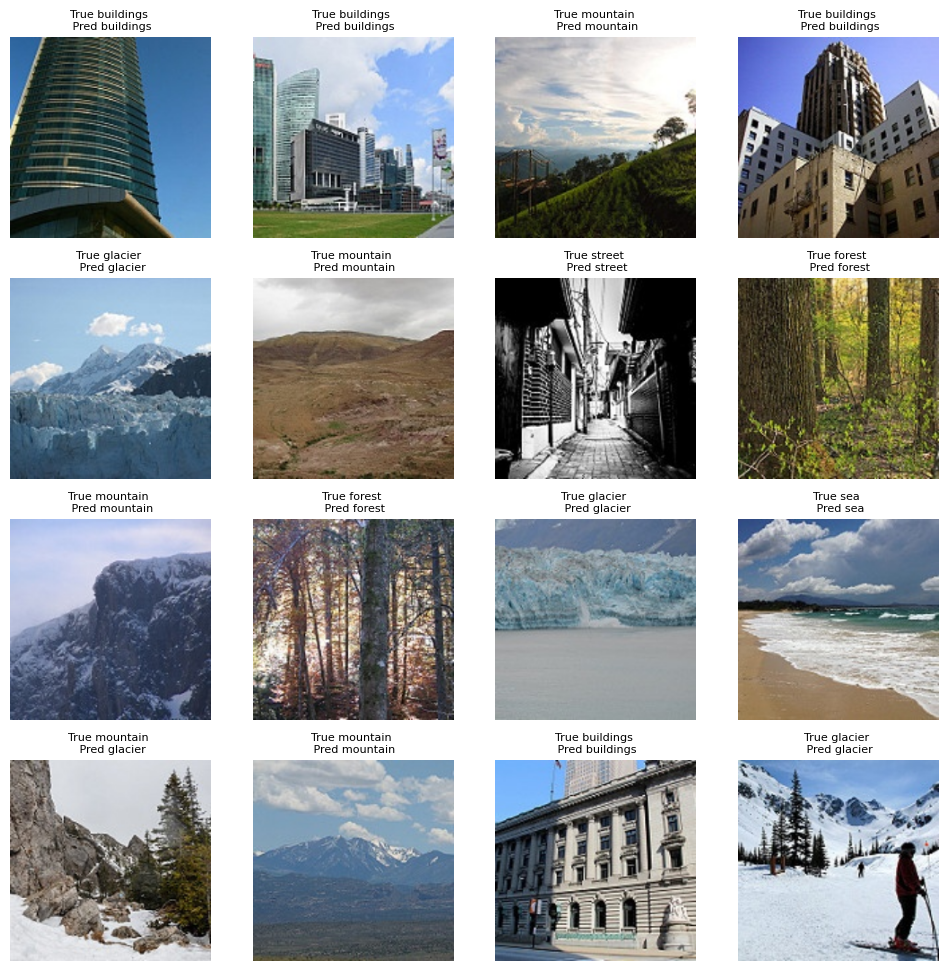

In [155]:
x, y = next(iter(DataLoader(train_dataset_vis, shuffle=True, batch_size= 64)))
x = x.to(device)
y = y.to(device)
y_true = model(x)

def pred_vis(x, y, y_true, n=4):
  id = train_dataset_vis.classes
  fig, ax = plt.subplots(n, n, figsize=(12, 12))
  ax = ax.ravel()
  for i in range (n * n):
    img = x[i].cpu().permute(1, 2, 0)
    ax[i].imshow(img)
    ax[i].set_title(f'True {id[y[i]]} \n Pred {id[y_true[i].argmax()]}', size=8)
    ax[i].axis('off')
    if id[y[i]] != id[y_true[i].argmax()]:
      ax[i].set_facecolor('red')

pred_vis(x, y, y_true)

In [156]:
torch.save(model.state_dict(), '/Users/igor/ds_bootcamp/Inception_ph2w1/model.pth')

In [157]:
def plot_training_history(train_losses, valid_losses, acc_train, acc_valid, title="Model Training History"):
    """
    Визуализирует историю обучения: потери и точность на обучающей и валидационной выборках.
    
    Параметры:
        train_losses (list): список значений потерь на обучении по эпохам
        valid_losses (list): список значений потерь на валидации по эпохам
        acc_train (list): список точностей на обучении по эпохам
        acc_valid (list): список точностей на валидации по эпохам
        title (str): заголовок графика
    """
    epochs = range(1, len(train_losses) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # --- Loss ---
    axes[0].plot(epochs, train_losses, 'o--', label='Train Loss', color='#1f77b4', markersize=4)
    axes[0].plot(epochs, valid_losses, 's--', label='Valid Loss', color='#ff7f0e', markersize=4)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss Dynamics')
    axes[0].legend()
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # --- Accuracy ---
    axes[1].plot(epochs, acc_train, 'o--', label='Train Accuracy', color='#2ca02c', markersize=4)
    axes[1].plot(epochs, acc_valid, 's--', label='Valid Accuracy', color='#d62728', markersize=4)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Dynamics')
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].set_ylim(0, 1)

    # Общий заголовок
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

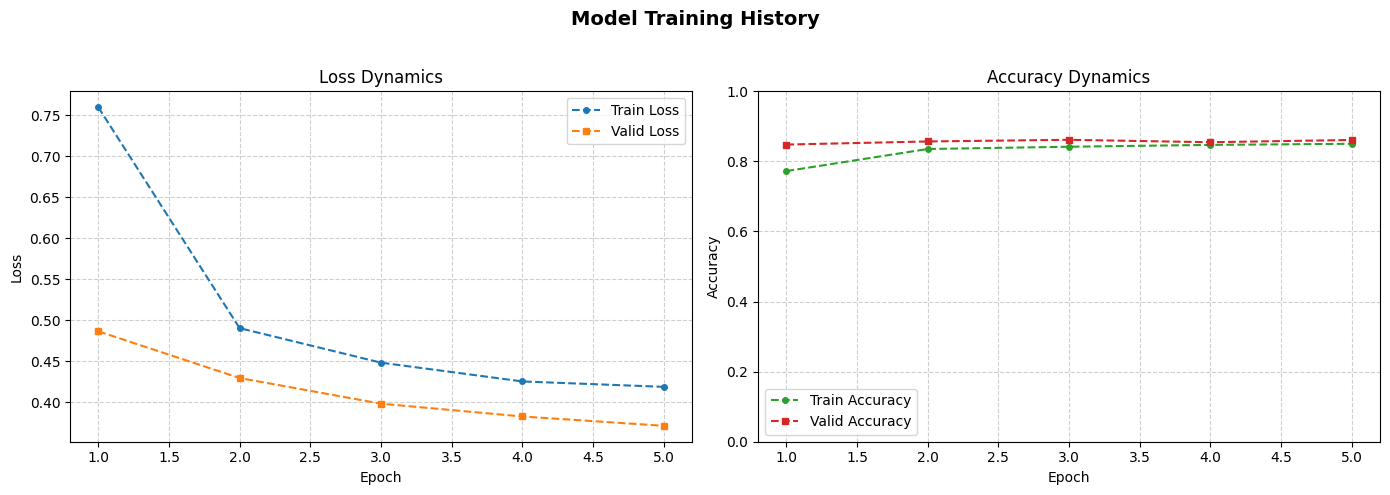

In [158]:
plot_training_history(tl1, vl1, ta1, va1)

In [207]:
np.save(os.path.join('/Users/igor/ds_bootcamp/Inception_ph2w1/data', 'tl1.npy'), tl1)
np.save(os.path.join('/Users/igor/ds_bootcamp/Inception_ph2w1/data', 'vl1.npy'), vl1)
np.save(os.path.join('/Users/igor/ds_bootcamp/Inception_ph2w1/data', 'ta1.npy'), ta1)
np.save(os.path.join('/Users/igor/ds_bootcamp/Inception_ph2w1/data', 'va1.npy'), va1)
np.save(os.path.join('/Users/igor/ds_bootcamp/Inception_ph2w1/data', 'conf.npy'), f1conf)

In [ ]:
from collections import Counter


labels = [label for _, label in train_dataset]
counts = Counter(labels)

class_names = train_dataset.classes  #

class_counts_with_names = {class_names[i]: counts[i] for i in range(len(class_names))}

print(class_counts_with_names)


{'buildings': 2191, 'forest': 2271, 'glacier': 2404, 'mountain': 2512, 'sea': 2274, 'street': 2382}


In [206]:
f1conf

[array([[359,   3,   1,   1,   5,  68],
        [  1, 460,   1,   5,   2,   5],
        [  0,   4, 397,  76,  66,  10],
        [  3,   5,  55, 405,  50,   7],
        [  3,   8,  21,  26, 443,   9],
        [ 37,   6,   1,   3,   9, 445]]),
 array([[372,   4,   1,   1,   4,  55],
        [  2, 463,   0,   2,   3,   4],
        [  2,   5, 436,  56,  47,   7],
        [  4,   4,  87, 388,  37,   5],
        [  2,   7,  29,  16, 448,   8],
        [ 44,   2,   2,   3,   5, 445]]),
 array([[353,   3,   2,   6,   3,  70],
        [  2, 458,   3,   7,   4,   0],
        [  0,   4, 447,  68,  29,   5],
        [  3,   1,  69, 426,  24,   2],
        [  3,   6,  20,  31, 443,   7],
        [ 38,   6,   3,   4,   8, 442]]),
 array([[373,   5,   2,   4,   4,  49],
        [  1, 459,   1,   5,   5,   3],
        [  1,   3, 432,  78,  36,   3],
        [  1,   3,  54, 433,  32,   2],
        [  3,   6,  20,  27, 447,   7],
        [ 28,   9,   3,   4,   5, 452]]),
 array([[380,   3,   2,   0,   7